# Jupiter Notebook for Scenario 06
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-06-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(390205, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 385620, 1: 4585})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    390205
srcIP                  13085
srcPrt                 56576
dstIP                  13670
dstPrt                   196
flowduration          230537
total_fpackets           749
total_bpackets           958
total_fpktl             9310
total_bpktl            19499
min_fpktl                139
min_bpktl                495
max_fpktl               1163
max_bpktl                945
mean_fpktl             18066
mean_bpktl             23623
std_fpktl              31071
std_bpktl              30357
total_fipt             99648
total_bipt             76648
min_fipt               55963
min_bipt               30762
max_fipt               96590
max_bipt               70930
mean_fipt              95121
mean_bipt              74298
std_fipt               74076
std_bipt               62731
fpsh_cnt                 227
bpsh_cnt                 436
furg_cnt                   1
burg_cnt                   1
total_fhlen             3373
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(390205, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(390205, 49)
(387390, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,1536,80,14.316805,9,11,930,8225,60,54,444,1434,103.333336,747.727295,127.765409,670.977208,14.316796,14.31679,0.010119,0.000008,9.258437,9.272627,1.7896,1.431679,3.4448,3.162234,1,3,0,0,192,232,0.628632,0.768328,1.396960,6.394583e+02,457.75,593.302612,1.005310,2.497656,2,2,0,19,0,0,0,8.844086,0
1,TCP,1527,80,0.000009,1,1,60,54,60,54,60,54,60.000000,54.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,20,20,110376.421875,110376.421875,220752.843750,1.258291e+07,57.00,4.242640,0.000009,0.000000,1,0,0,2,0,0,0,0.900000,0
2,TCP,80,1523,0.000004,1,1,54,60,54,60,54,60,54.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,20,20,246723.765625,246723.765625,493447.531250,2.812651e+07,57.00,4.242640,0.000004,0.000000,1,0,0,2,0,0,0,1.111111,0
3,TCP,1525,80,0.000012,1,1,60,54,60,54,60,54,60.000000,54.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,20,20,83886.078125,83886.078125,167772.156250,9.563013e+06,57.00,4.242640,0.000012,0.000000,1,0,0,2,0,0,0,0.900000,0
4,TCP,1526,80,0.000010,1,1,60,54,60,54,60,54,60.000000,54.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,20,20,99864.382812,99864.382812,199728.765625,1.138454e+07,57.00,4.242640,0.000010,0.000000,1,0,0,2,0,0,0,0.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390200,UDP,52584,53,0.000232,1,1,86,170,86,170,86,170,86.000000,170.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,52,136,4310.692871,4310.692871,8621.385742,1.103537e+06,128.00,59.396969,0.000232,0.000000,0,0,0,0,0,0,0,1.976744,0
390201,UDP,9265,53,0.000330,1,1,88,200,88,200,88,200,88.000000,200.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,54,166,3030.566406,3030.566406,6061.132812,8.728031e+05,144.00,79.195961,0.000330,0.000000,0,0,0,0,0,0,0,2.272727,0
390202,UDP,56361,53,0.000000,1,0,68,0,68,0,68,0,68.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,34,0,0.000000,0.000000,0.000000,0.000000e+00,68.00,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
390203,UDP,56362,53,0.411865,1,1,74,74,74,74,74,74,74.000000,74.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0,0,0,0,40,40,2.427980,2.427980,4.855960,3.593411e+02,74.00,0.000000,0.411865,0.000000,0,0,0,0,0,0,0,1.000000,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 382823 of 387390 (98.8%)
> Class 1 : 4567 of 387390 (1.2%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((309912, 48), (77478, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
21479,0.090672,4.885178e-10,0.000029,8.515581,19,32,1597,39172,60,54,511,1434,84.052635,1224.125,103.399157,496.255899,8.515568,8.515561,0.000029,0.000007,3.015941,3.016291,0.473087,0.274696,0.824898,0.734965,1,10,0,0,392,652,2.231204,3.757818,5.989022,4.787577e+03,799.392157,682.964844,0.218874,0.623614,2,2,0,50,0,0,0,24.528490
343040,0.000144,2.917726e-05,0.000074,4.961661,1,1,79,79,79,79,79,79,79.000000,79.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,45,45,0.201545,0.201545,0.403091,3.184417e+01,79.000000,0.000000,4.961661,0.000000,0,0,0,0,0,0,0,1.000000
276756,0.000144,3.957173e-06,0.000074,0.000252,1,1,72,164,72,164,72,164,72.000000,164.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,130,3968.121094,3968.121094,7936.242188,9.364766e+05,118.000000,65.053825,0.000252,0.000000,0,0,0,0,0,0,0,2.277778
41184,0.090672,1.406609e-03,0.000029,7.961518,8,13,1330,8177,66,54,618,1514,166.250000,629.000,199.073389,728.282683,6.821363,7.961499,0.027465,0.000013,2.474420,2.034013,0.974480,0.663458,0.822401,0.651389,2,3,0,0,276,464,1.004833,1.632854,2.637688,1.194119e+03,452.714286,620.590515,0.608256,0.766831,2,3,1,19,0,0,0,6.148120
269073,0.000144,2.667211e-08,0.000074,1.383799,1,1,79,427,79,427,79,427,79.000000,427.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,45,393,0.722648,0.722648,1.445297,3.656600e+02,253.000000,246.073166,1.383799,0.000000,0,0,0,0,0,0,0,5.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261015,0.000144,2.917726e-05,0.000074,0.678224,1,1,78,283,78,283,78,283,78.000000,283.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,249,1.474439,1.474439,2.948878,5.322725e+02,180.500000,144.956894,0.678224,0.000000,0,0,0,0,0,0,0,3.628205
368469,0.000144,7.897647e-05,0.000074,0.689931,1,1,88,183,88,183,88,183,88.000000,183.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,54,149,1.449420,1.449420,2.898841,3.927929e+02,135.500000,67.175148,0.689931,0.000000,0,0,0,0,0,0,0,2.079545
132732,0.000144,3.957173e-06,0.000074,2.991696,1,1,84,132,84,132,84,132,84.000000,132.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,50,98,0.334259,0.334259,0.668517,7.219984e+01,108.000000,33.941124,2.991696,0.000000,0,0,0,0,0,0,0,1.571429
147796,0.000144,0.000000e+00,0.000074,84.538348,2,2,171,814,85,402,86,412,85.500000,407.000,0.707107,7.071068,83.965706,83.947510,83.965706,83.947510,83.965706,83.947510,83.965706,83.947510,0.000000,0.000000,0,0,0,0,103,746,0.023658,0.023658,0.047316,1.165152e+01,246.250000,185.663452,28.376394,48.141756,0,0,0,0,0,0,0,4.760234


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
361727,0.000144,0.000560,0.000074,0.287078,1,1,81,379,81,379,81,379,81.000000,379.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,47,345,3.483375,3.483375,6.966750,1.602353e+03,230.000000,210.717819,0.287078,0.000000,0,0,0,0,0,0,0,4.679012
181493,0.000144,0.000011,0.000074,7.661881,1,1,67,67,67,67,67,67,67.000000,67.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,33,33,0.130516,0.130516,0.261033,1.748918e+01,67.000000,0.000000,7.661881,0.000000,0,0,0,0,0,0,0,1.000000
323962,0.000144,0.011800,0.000074,0.000207,1,1,85,177,85,177,85,177,85.000000,177.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,143,4832.147461,4832.147461,9664.294922,1.266023e+06,131.000000,65.053825,0.000207,0.000000,0,0,0,0,0,0,0,2.082353
342506,0.000144,0.011800,0.000074,0.946332,1,1,69,69,69,69,69,69,69.000000,69.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,35,35,1.056712,1.056712,2.113423,1.458262e+02,69.000000,0.000000,0.946332,0.000000,0,0,0,0,0,0,0,1.000000
129561,0.000144,0.001407,0.000074,0.000141,1,1,85,132,85,132,85,132,85.000000,132.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,98,7084.973145,7084.973145,14169.946289,1.537439e+06,108.500000,33.234020,0.000141,0.000000,0,0,0,0,0,0,0,1.552941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93074,0.000144,0.001407,0.000074,0.000158,1,1,155,54,155,54,155,54,155.000000,54.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,121,20,6335.806641,6335.806641,12671.613281,1.324184e+06,104.500000,71.417786,0.000158,0.000000,0,0,0,0,0,0,0,0.348387
223219,0.000144,0.003174,0.000074,0.000230,1,1,85,149,85,149,85,149,85.000000,149.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,115,4346.429199,4346.429199,8692.858398,1.017064e+06,117.000000,45.254833,0.000230,0.000000,0,0,0,0,0,0,0,1.752941
33995,0.090672,0.001407,0.000029,58.119570,3,1,186,66,60,66,66,66,62.000000,66.00,3.464102,0.000000,58.119570,0.000000,0.719824,0.000000,57.399746,0.000000,29.059786,0.000000,40.078758,0.000000,0,0,0,0,72,32,0.051618,0.017206,0.068824,4.335889e+00,63.000000,3.464102,19.373193,32.933928,0,2,1,3,0,0,0,0.354839
2449,0.090672,0.003174,0.000029,7.603176,4,3,246,174,60,54,66,66,61.500000,58.00,3.000000,6.928203,7.603176,7.242725,0.360561,0.000117,5.581491,7.242608,2.534392,3.621363,2.717807,5.121214,0,0,0,0,92,72,0.526096,0.394572,0.920668,5.524007e+01,60.000000,4.898980,1.267219,2.209403,2,2,0,6,0,0,0,0.707317


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,2.601313,-0.184870,-0.117679,-0.015759,0.008100,0.037551,-0.001816,0.265873,-0.961539,-0.844649,2.586006,3.220490,-0.238659,4.202997,1.608220,2.982177,-0.002930,0.016761,-0.175957,-0.107477,-0.047749,0.005844,-0.178082,-0.137796,-0.036051,-0.038434,-0.003400,0.095320,0.0,0.0,0.005254,0.023337,-0.159838,-0.356574,-0.234528,-0.351125,4.502934,3.726059,-0.352584,-0.138769,2.878045,2.164421,-0.138041,0.019443,0.0,0.0,0.0,5.186693
1,-0.384421,-0.184405,-0.117231,-0.042522,-0.007092,-0.014008,-0.003008,-0.061077,-0.221514,-0.609428,-0.355716,-0.509976,-0.380665,-0.551830,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.005080,-0.031475,0.0,0.0,-0.009270,-0.026912,-0.159941,-0.357219,-0.234784,-0.354444,-0.549865,-0.669878,0.501550,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.387943
2,-0.384421,-0.184807,-0.117231,-0.079884,-0.007092,-0.014008,-0.003013,-0.060366,-0.494155,0.190325,-0.403383,-0.275961,-0.577403,-0.198890,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.005080,-0.031475,0.0,0.0,-0.009563,-0.019876,0.040339,0.362390,0.127819,0.299190,-0.276321,-0.251156,-0.391956,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.085198
3,2.601313,-0.162431,-0.117679,-0.019932,-0.001184,0.005950,-0.002025,0.006650,-0.727847,-0.844649,3.314627,3.440739,2.071535,1.731898,3.373252,4.524441,-0.015734,0.010967,-0.171722,-0.107476,-0.089805,-0.061079,-0.112440,-0.084724,-0.036600,-0.055415,-0.001721,0.006563,0.0,0.0,0.000399,0.007774,-0.159900,-0.356959,-0.234681,-0.353633,2.071351,3.324583,-0.282459,-0.109666,2.878045,3.421661,3.850819,0.002059,0.0,0.0,0.0,0.831808
4,-0.384421,-0.184870,-0.117231,-0.069465,-0.007092,-0.014008,-0.003008,-0.058166,-0.221514,2.664852,-0.355716,0.448107,-0.380665,0.893147,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.005080,-0.031475,0.0,0.0,-0.009270,0.001896,-0.159914,-0.357124,-0.234736,-0.354211,0.670563,0.913984,-0.142791,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,0.655754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309907,-0.384421,-0.184405,-0.117231,-0.074779,-0.007092,-0.014008,-0.003009,-0.059371,-0.260463,1.309978,-0.362526,0.051659,-0.408771,0.295225,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.005080,-0.031475,0.0,0.0,-0.009312,-0.010025,-0.159876,-0.356988,-0.234667,-0.354095,0.162052,0.263144,-0.269859,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,0.234761
309908,-0.384421,-0.183611,-0.117231,-0.074690,-0.007092,-0.014008,-0.003001,-0.060207,0.129024,0.369093,-0.294431,-0.223652,-0.127716,-0.119998,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.005080,-0.031475,0.0,0.0,-0.008893,-0.018303,-0.159878,-0.356992,-0.234670,-0.354192,-0.153576,-0.237502,-0.267751,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.132165
309909,-0.384421,-0.184807,-0.117231,-0.057357,-0.007092,-0.014008,-0.003004,-0.060633,-0.026771,-0.110759,-0.321669,-0.364061,-0.240138,-0.331762,-0.299325,-0.316397,-0.0

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.384421,-0.175943,-0.117231,-0.077724,-0.007092,-0.014008,-0.003006,-0.058568,-0.143617,2.213227,-0.342097,0.315958,-0.324454,0.693840,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009186,-0.002077,-0.159775,-0.356624,-0.234484,-0.353348,0.509242,0.686418,-0.340301,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,0.483730
1,-0.384421,-0.184699,-0.117231,-0.022188,-0.007092,-0.014008,-0.003017,-0.061177,-0.688898,-0.722334,-0.437431,-0.543013,-0.717930,-0.601657,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009772,-0.027906,-0.159944,-0.357232,-0.234790,-0.354454,-0.634032,-0.669878,0.987835,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.387943
2,-0.384421,0.003376,-0.117231,-0.079884,-0.007092,-0.014008,-0.003003,-0.060257,0.012178,0.312640,-0.314859,-0.240171,-0.212032,-0.144911,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009019,-0.018800,0.083951,0.519087,0.206777,0.529211,-0.185139,-0.251156,-0.391964,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.131500
3,-0.384421,0.003376,-0.117231,-0.072760,-0.007092,-0.014008,-0.003016,-0.061160,-0.611001,-0.703516,-0.423812,-0.537507,-0.661720,-0.593353,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009689,-0.027740,-0.159897,-0.357064,-0.234705,-0.354365,-0.620004,-0.669878,-0.221575,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.387943
4,-0.384421,-0.162431,-0.117231,-0.079885,-0.007092,-0.014008,-0.003003,-0.060633,0.012178,-0.110759,-0.314859,-0.364061,-0.212032,-0.331762,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009019,-0.022525,0.197662,0.927652,0.412648,0.718659,-0.342953,-0.455965,-0.391976,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.256934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77473,-0.384421,-0.162431,-0.117231,-0.079885,-0.007092,-0.014008,-0.002948,-0.061286,2.738586,-0.844649,0.161809,-0.578803,1.755348,-0.655636,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.006089,-0.028982,0.159848,0.791786,0.344186,0.569808,-0.371009,-0.210194,-0.391972,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.542331
77474,-0.384421,-0.134243,-0.117231,-0.079884,-0.007092,-0.014008,-0.003003,-0.060491,0.012178,0.049192,-0.314859,-0.317258,-0.212032,-0.261174,-0.299325,-0.316397,-0.067289,-0.072296,-0.175962,-0.107478,-0.281976,-0.199657,-0.240017,-0.175297,-0.217489,-0.187765,-0.00508,-0.031475,0.0,0.0,-0.009019,-0.021118,0.059434,0.430999,0.162390,0.355440,-0.283335,-0.378593,-0.391960,-0.265493,-0.317163,-0.350058,-0.138041,-0.008596,0.0,0.0,0.0,-0.209548
77475,2.601313,-0.162431,-0.117679,0.357784,-0.005404,-0.014008,-0.002924,-0.061185,-0.961539,-0.731743,-0.444240,-0.545766,-0.858458,-0.605809,-0.23541

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_cwr
flow_ece


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((309912, 43), (77478, 43))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,
                                       max_iter=1000),parameters,cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.24 hrs.


In [33]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': 0.001}
accuracy : 0.9975831828424333


In [34]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     76568
     class 1       0.76      0.99      0.86       910

    accuracy                           1.00     77478
   macro avg       0.88      0.99      0.93     77478
weighted avg       1.00      1.00      1.00     77478



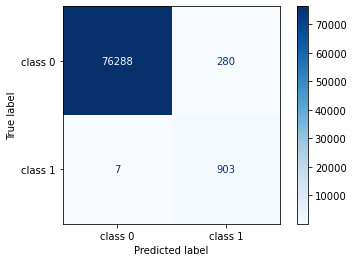

In [35]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [36]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 306255, 1: 3657})
Resample dataset shape: Counter({0: 306255, 1: 306255})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [37]:
#Run grid search only on training set using cross-validation
start=perf_counter()
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=RandomizedSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, n_jobs=-1, verbose=3)
model2.fit(X_smote,y_smote)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.48 hrs.


In [38]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 1000.0}
accuracy : 0.9959527191392794
Best Model: LogisticRegression(C=1000.0, max_iter=1000, solver='saga')


In [39]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     76568
     class 1       0.76      0.99      0.86       910

    accuracy                           1.00     77478
   macro avg       0.88      0.99      0.93     77478
weighted avg       1.00      1.00      1.00     77478



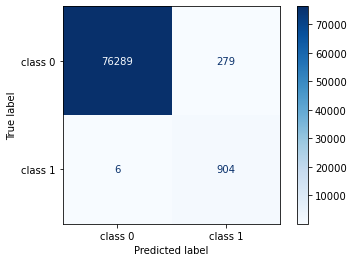

In [40]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-DT)

In [41]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'criterion':['gini','entropy'], 'max_depth' : np.arange(1, 20)}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, n_jobs=-1, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Elapsed time: 0.01 hrs.


In [42]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 15}
accuracy : 0.9999548258548201
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15)


In [43]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     76568
     class 1       1.00      0.85      0.92       910

    accuracy                           1.00     77478
   macro avg       1.00      0.92      0.96     77478
weighted avg       1.00      1.00      1.00     77478



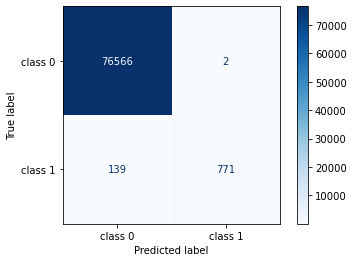

In [44]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [45]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [46]:
# define the undersampling method
oss = OneSidedSelection(random_state=0, n_jobs=-1)
start=perf_counter()
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)
# summarize the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_oss))

Elapsed time: 0.14 hrs.
Original dataset shape: Counter({0: 306255, 1: 3657})
Resample dataset shape: Counter({0: 222075, 1: 3657})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [47]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'C':np.arange(1, 20)}
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5,n_jobs=-1, verbose=3)
model4.fit(X_oss, y_oss)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Elapsed time: 0.17 hrs.


In [48]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1}
accuracy : 0.9997740689137311
Best Model: SVC(C=1, class_weight='balanced')


In [49]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     76568
     class 1       0.98      1.00      0.99       910

    accuracy                           1.00     77478
   macro avg       0.99      1.00      0.99     77478
weighted avg       1.00      1.00      1.00     77478



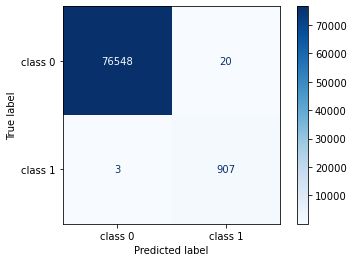

In [50]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [51]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters = {'max_depth': np.arange (2, 10),'n_estimators': np.arange(60, 220, 40), 
              'learning_rate': [0.1, 0.01, 0.05],'gamma' : [0.1, 1, 1.5], 
              'subsample' : [0.8, 0.9, 1.0],
             'colsample_bytree' : [0.3, 0.5, 1.0]}
model5 = RandomizedSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False),
                            parameters, cv=5, n_jobs=-1,scoring='roc_auc',verbose=3)
model5.fit(df_X_train_stand, y_train)
tl=(perf_counter()-start)/3600
print ('Elapsed time: %.2f hrs.' %tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.03 hrs.


In [52]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("roc_auc :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'subsample': 1.0, 'n_estimators': 140, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}
roc_auc : 0.9999997187239519
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='logloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [53]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     76568
     class 1       1.00      1.00      1.00       910

    accuracy                           1.00     77478
   macro avg       1.00      1.00      1.00     77478
weighted avg       1.00      1.00      1.00     77478



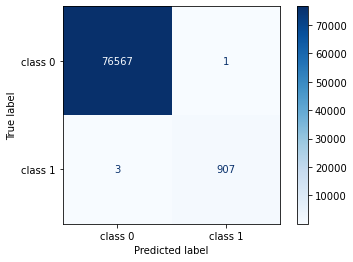

In [54]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [55]:
#save notebook session
import dill
dill.dump_session('session_esc-06.db')
#to restore a notebook session
#dill.load_session('session_esc-06.db')